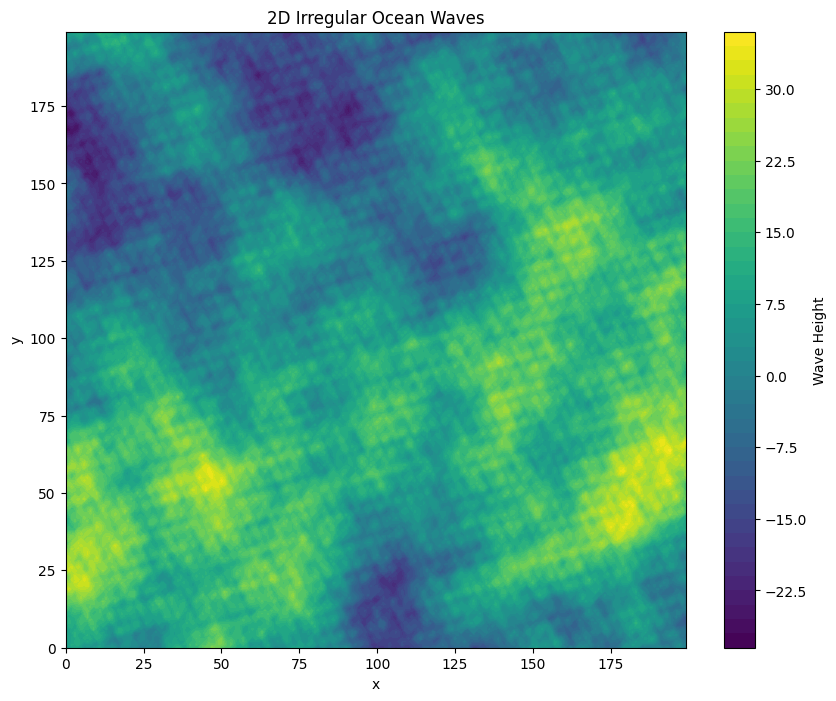

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_irregular_waves(grid_size, num_waves, length_scale):
    """
    Generates a 2D grid of irregular ocean waves.
    
    Parameters:
        grid_size (int): Size of the grid (grid_size x grid_size).
        num_waves (int): Number of sinusoidal waves to sum.
        length_scale (float): Characteristic length scale of the waves.
        
    Returns:
        np.ndarray: 2D array of wave heights.
    """
    # Create a grid of points
    x = np.linspace(0, 2 * np.pi, grid_size)
    y = np.linspace(0, 2 * np.pi, grid_size)
    x, y = np.meshgrid(x, y)
    
    # Initialize wave height array
    eta = np.zeros((grid_size, grid_size))
    
    for _ in range(num_waves):
        # Random wave parameters
        amplitude = np.random.rand()  # Amplitude between 0 and 1
        wavelength = np.random.rand() * length_scale  # Random wavelength scaled by length_scale
        kx = 2 * np.pi / wavelength * (2 * np.random.rand() - 1)  # Random wave number in x direction
        ky = 2 * np.pi / wavelength * (2 * np.random.rand() - 1)  # Random wave number in y direction
        phase = 2 * np.pi * np.random.rand()  # Random phase
        
        # Add sinusoidal wave to eta
        eta += amplitude * np.sin(kx * x + ky * y + phase)
    
    return eta

# Parameters
grid_size = 200  # Size of the grid
num_waves = 1000  # Number of waves to sum
length_scale = 10.0  # Characteristic length scale of the waves

# Generate waves
eta = generate_irregular_waves(grid_size, num_waves, length_scale)

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(eta, levels=50, cmap='viridis')
plt.colorbar(label='Wave Height')
plt.title('2D Irregular Ocean Waves')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_irregular_waves(grid_size, num_waves, length_scale, time, speed, wave_params=None):
    """
    Generates a 2D grid of irregular ocean waves at a given time.
    
    Parameters:
        grid_size (int): Size of the grid (grid_size x grid_size).
        num_waves (int): Number of sinusoidal waves to sum.
        length_scale (float): Characteristic length scale of the waves.
        time (float): Current time for wave propagation.
        speed (float): Speed of wave propagation.
        wave_params (dict): Wave parameters for initial frame (t=0).
        
    Returns:
        np.ndarray: 2D array of wave heights.
        
    Author: Akaawase Bernard 2024
    """
    # Create a grid of points
    x = np.linspace(0, 2 * np.pi, grid_size)
    y = np.linspace(0, 2 * np.pi, grid_size)
    x, y = np.meshgrid(x, y)
    
    # Initialize wave height array
    eta = np.zeros((grid_size, grid_size))
    
    if wave_params is None:
        wave_params = {}  # Initialize empty dictionary for wave parameters
    
    for i in range(num_waves):
        if time == 0:
            # Random wave parameters only for initial frame
            amplitude = np.random.rand() /10 #gen Amplitude 
            wavelength = np.random.rand() * length_scale  # Random wavelength scaled by length_scale
            kx = 2 * np.pi / wavelength * (2 * np.random.rand() - 1)  # Random wave number in x direction
            ky = 2 * np.pi / wavelength * (2 * np.random.rand() - 1)  # Random wave number in y direction
            phase = 2 * np.pi * np.random.rand()  # Random phase
            frequency = (speed / (2 * np.pi)) * np.sqrt(kx**2 + ky**2) #linear dispersion

            wave_params[i] = {'amplitude': amplitude, 'wavelength': wavelength, 'kx': kx, 
                              'ky': ky, 'phase': phase, 'frequency': frequency}
        else:
            # Use wave parameters from initial frame for subsequent frames
            amplitude = wave_params[i]['amplitude']
            wavelength = wave_params[i]['wavelength']
            kx = wave_params[i]['kx']
            ky = wave_params[i]['ky']
            phase = wave_params[i]['phase']
            frequency = wave_params[i]['frequency']
        
        # Add sinusoidal wave to eta with time dependency
        eta += amplitude * np.sin(kx * x + ky * y - frequency * time + phase)
    
    return eta, wave_params

# Parameters
grid_size = 210  # Size of the grid
num_waves = 1000  # Number of waves to sum
length_scale = 10.0  # Characteristic length scale of the waves
speed = 1.0  # Speed of wave propagation
num_frames = 5000  # Number of frames for the animation
time_interval = 0.2  # Time interval between frames

# Create directory for storing frames
output_dir = 'figs'
os.makedirs(output_dir, exist_ok=True)

# Generate and save frames
wave_params = None  # Initialize wave parameters for the first frame
for frame in range(num_frames):
    time = frame * time_interval
    eta, wave_params = generate_irregular_waves(grid_size, num_waves, length_scale, time, speed, wave_params)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    #plt.contourf(eta, levels=120, cmap='viridis', vmin = -3.5, vmax =3.5)
    plt.contourf(eta, levels=120, cmap='Blues_r', vmin = -3., vmax =3.5)

    #plt.pcolor(eta, cmap='Blues_r', vmin = -3.5, vmax =3.5)
    #plt.contourf(eta, level = 10, cmap='Blues_r', vmin = -3.5, vmax =3.5)

    plt.colorbar(label='Wave Height (m)')
    plt.title(f' Sciencestical 2:  Ocean Waves (t={time:.1f}s)', fontsize = 20)
    plt.xlabel('X (m)', fontsize = 20)
    plt.ylabel('Y (m)', fontsize = 20)
    #plt.show()
    
    # Save the frame
    plt.savefig(f'{output_dir}/frame_{frame:03d}.png')
    plt.close()

print(f"Frames saved in the directory '{output_dir}'.")